In [8]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima

# Load the data
df = pd.read_csv('train.csv', parse_dates=['Last Sold On'])

# Set the index to the date column
df.set_index('Last Sold On', inplace=True)

# Perform grid search to find best hyperparameters
model = auto_arima(df['Listed Price'], seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_order=None, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1570052.263, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1556397.667, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1570050.263, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1550721.441, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1547635.880, Time=1.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1545687.762, Time=1.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1544300.540, Time=1.48 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.11 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1544298.540, Time=1.31 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1545685.762, Time=1.12 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=11.61 sec
 ARIMA(4,1,1)(0,0,0)[0]      

   Id            Address  Sold Price  \
0   0        540 Pine Ln   3825000.0   
1   1     1727 W 67th St    505000.0   
2   2     28093 Pine Ave    140000.0   
3   3  10750 Braddock Dr   1775000.0   
4   4  7415 O Donovan Rd   1175000.0   

                                             Summary          Type  \
0  540 Pine Ln, Los Altos, CA 94022 is a single f...  SingleFamily   
1  HURRY, HURRY.......Great house 3 bed and 2 bat...  SingleFamily   
2  'THE PERFECT CABIN TO FLIP!  Strawberry deligh...  SingleFamily   
3  Rare 2-story Gated 5 bedroom Modern Mediterran...  SingleFamily   
4  Beautiful 200 acre ranch land with several pas...    VacantLand   

   Year built                                       Heating  \
0      1969.0  Heating - 2+ Zones, Central Forced Air - Gas   
1      1926.0                                   Combination   
2      1958.0                                    Forced air   
3      1947.0                                       Central   
4         NaN          

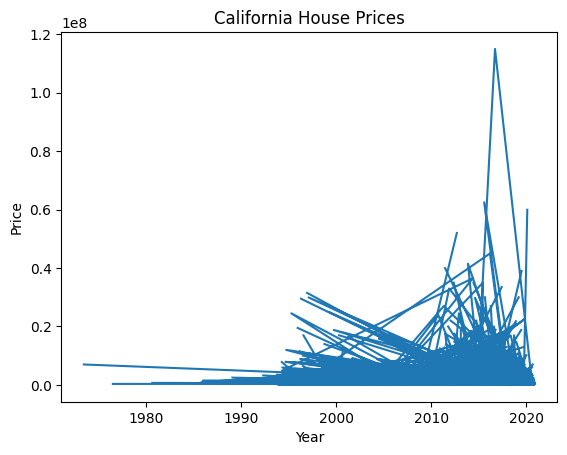

ADF Statistic: -218.20224351292282
p-value: 0.0
Critical Values:
	1%: -3.430487856863414
	5%: -2.8616009298299074
	10%: -2.566802430945953


C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:           Listed Price   No. Observations:                47439
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -772143.270
Date:                Sun, 14 May 2023   AIC                        1544298.540
Time:                        10:44:39   BIC                        1544351.143
Sample:                             0   HQIC                       1544315.058
                              - 47439                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8369      0.000  -3056.102      0.000      -0.837      -0.836
ar.L2         -0.6729      0.000  -1942.069      0.000      -0.674      -0.672
ar.L3         -0.5047      0.000  -1377.981      0.0

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('train.csv')
print(df.head())
print(df.info())
print(df.describe())


df['Last Sold On'] = pd.to_datetime(df['Last Sold On'])
df.set_index('Last Sold On', inplace=True)

plt.plot(df['Listed Price'])
plt.title('California House Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

result = adfuller(df['Listed Price'])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

model = ARIMA(df['Listed Price'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Daniel\AppData\Local\Temp\ipykernel_41248\9375935.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('MS').mean()
C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wil

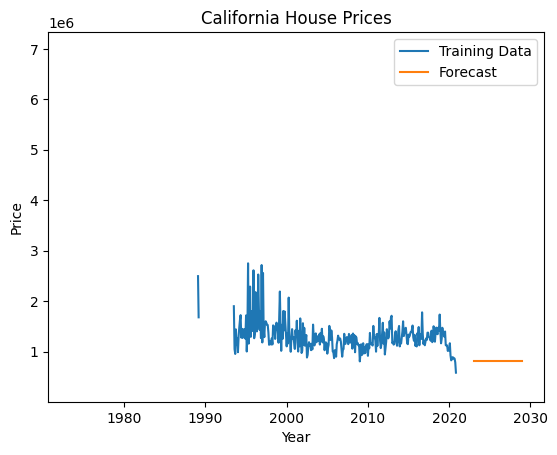

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare the data
df = pd.read_csv('train.csv')
df['Last Sold On'] = pd.to_datetime(df['Last Sold On'])
df.set_index('Last Sold On', inplace=True)
df = df.resample('MS').mean()

# Train the model on the data up to 2020
train_data = df[:'2020']
model = ARIMA(train_data['Listed Price'], order=(5,1,0))
model_fit = model.fit()

# Forecast future prices
forecast = model_fit.forecast(steps=72)
forecast = pd.DataFrame(forecast[0], index=pd.date_range(start='2023-01-01', periods=72, freq='MS'), columns=['Listed Price Forecast'])

# Plot the forecast
plt.plot(df['Listed Price'], label='Training Data')
plt.plot(forecast['Listed Price Forecast'], label='Forecast')
plt.title('California House Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Inconclusive Results.